Calculates the location of peaks from a diffraction pattern by using skued module. Two visualizations are displayed to indicate the Bragg peak position; one circled and other squared. Peaks are numbered based on their intensity. 

In [1]:
import skued
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle

c:\ProgramData\Anaconda3\envs\ued00\lib\site-packages\pyqtgraph-0.13.3-py3.9.egg\pyqtgraph\colors\palette.py:1: RuntimeWarning: PyQtGraph supports Qt version >= 5.15, but 5.9.7 detected.
  from ..Qt import QtGui


In [2]:
#%%
def plotLarge():
    SMALL_SIZE = 20
    MEDIUM_SIZE = 32
    BIGGER_SIZE = 24

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labelsc
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rcParams["font.family"] = "Cambria"

In [3]:
os.chdir(r'.') #path of the tiff file
#for filename in os.listdir():
im=skued.diffread(r'./2588000.tif') #your tiff filename
peaks=skued.bragg_peaks_persistence(im,prominence=5000)[0] #adjust prominence such that you have around 15-20 peaks
#print(peaks)
np.savetxt('peakFile.csv',peaks,delimiter=',') #saving peakFile

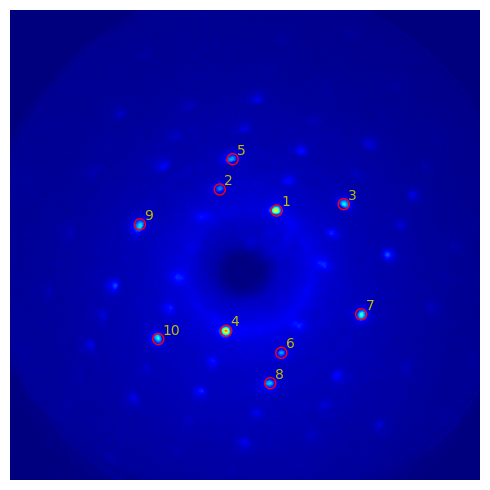

In [4]:
fig,ax=plt.subplots(figsize=(5,5))
plt.imshow(im, cmap='jet', vmin=3000, vmax=30000)
i=1
for pp in peaks:
    ax.add_patch(Circle(xy=(pp[0],pp[1]),radius=6, ec="r", fc="none"))
    plt.text(pp[0]+5,pp[1]-5,'%d'%i,color="y")
    i+=1
plt.axis('off')
plt.tight_layout()
plt.show()

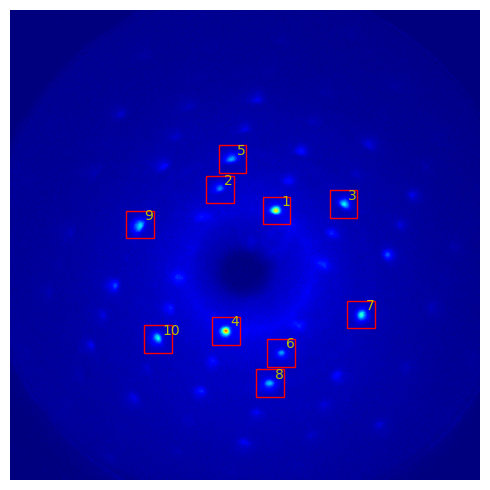

In [5]:
fig,ax=plt.subplots(figsize=(5,5))
plt.imshow(im, cmap='jet', vmin=3000, vmax=30000)
i=1
for pp in peaks:
    ax.add_patch(Rectangle(xy=(pp[0]-15,pp[1]-15), width=30, height=30,  ec="r", fc="none"))
    plt.text(pp[0]+5,pp[1]-5,'%d'%i,color="y")
    i+=1
plt.axis('off')
plt.tight_layout()
plt.show()